In [ ]:
#SAR Project
#Nathan COHEN - LEROY Thibault - CUZOU Alexandre

#REQUIREMENT 1
#1.4.1 Plots that evolve with time

In [ ]:
PORT = 8001

import requests

import time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [ ]:
# Make a request to create a new simulation
def init():
    #Tester pour sim1, sim2 et sim3
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example/sim3'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

In [ ]:
# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")


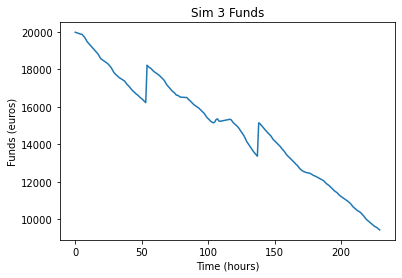

In [ ]:
#Budget / Funds
# Make a request to get the current funds available
def get_next_point_funds():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

# List holding the x values
data_x = []
# List holding the y values
data_y = []

# Create sim
init()

for x in range(0, 230):
    next_step() # Do one step
    y = get_next_point_funds() # Request a new random value and store in y

    data_x.append(x)  # Add the current x to the list
    data_y.append(y) # Add the current y to the list
    
    plt.title("Sim 3 Funds")
    plt.xlabel("Time (hours)")
    plt.ylabel("Funds (euros)")
    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

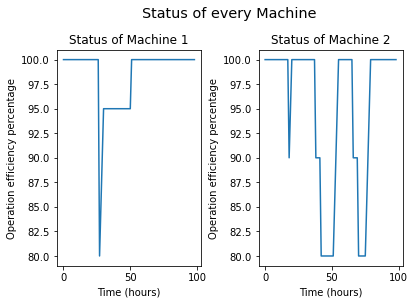

Next Step
Status of machine : 100.0
Status of machine : 100.0


In [ ]:
#Status of every machine

# Make a request to get the STATUS OF EVERY MACHINE
def get_next_point_machine():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/machine'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        response_list = []
        
        #We consider each element of the list jresponse machine
        for i in range(len(jresponse)):
            print(f"Status of machine : {jresponse[i]['operating_efficiency_percentage']}")
            response_list.append(jresponse[i]['operating_efficiency_percentage'])
        return response_list, len(jresponse)
    else:
        return None

# List holding the x values
data_x = []
# List holding the y values
data_y = []

# Create sim
init()

for x in range(0, 100):
    next_step() # Do one step
    y_list, lenght_data = get_next_point_machine() # Request a new random value and store in y
    
    data_x.append(x)  # Add the current x to the list
    #data_y1.append(y_list[0]) # Add the current y to the list
    #data_y2.append(y_list[1]) # Add the current y to the list
    data_y.append(y_list)

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    
    fig = plt.figure()
    st = fig.suptitle("Status of every Machine", fontsize="x-large")
    
    #We plot lenght_data graphs of the evolution of the status of every machine
    for i in range(lenght_data):
        ax = fig.add_subplot(1, lenght_data, i+1)
        ax.set_title(f"Status of Machine {i+1}")
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Operation efficiency percentage")
        data_yi = []
        for j in range(len(data_y)) :
            data_yi.append(data_y[j][i])
        ax.plot(data_x, data_yi) # Re-plot the data with the new added values in the list machine i
    
    st.set_y(1)
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.85,  
                    wspace=0.4,  
                    hspace=0.4) 
    
    
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

In [ ]:
#Health / Sickness of every employee

# Make a request to get the HEALTH / SICKNESS OF EVERY EMPLOYEE
def get_next_point_health():
    '''Return the response_list of the health / sickness of each employee and the number of employee'''
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/employee'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        response_list = []
        
        #We consider each element of the list jresponse employee
        for i in range(len(jresponse)):
            print(f"Health / Sickness: {jresponse[i]['remaining_sickness_in_hours_worked']}")
            response_list.append(jresponse[i]['remaining_sickness_in_hours_worked'])
        return response_list, len(jresponse)
    else:
        return None

# List holding the x values
data_x = []
# List holding the y values
data_y = []

# Create sim
init()

for x in range(0, 100):
    next_step() # Do one step
    y_list, lenght_data = get_next_point_health() # Request a new random value and store in y
    
    data_x.append(x)  # Add the current x to the list data_x
    data_y.append(y_list) # Add the current y_list to the list data_y

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    
    fig = plt.figure()
    st = fig.suptitle("Health / Sickness", fontsize="x-large")
    #plt.title("Health / Sickness")
    
    #We plot lenght_data graphs of the evolution of the status of every machine
    for i in range(lenght_data):
        if (i < int(lenght_data / 2))  :
            ax = fig.add_subplot(2, int(lenght_data / 2), i+1)
        else :
            ax = fig.add_subplot(2, lenght_data - int(lenght_data / 2), i+1)
            
        #ax = fig.add_subplot(1, lenght_data, i+1)
        ax.set_title(f"Employee {i+1}")
        ax.set_ylabel("Sickness")
        ax.set_xlabel("Time (hours)")
        data_yi = []
        for j in range(len(data_y)) :
            data_yi.append(data_y[j][i])
        ax.plot(data_x, data_yi) # Re-plot the data with the new added values in the list machine i
        
    st.set_y(1)
    
    plt.subplots_adjust(left=0.1, 
                    bottom=0,  
                    right=0.9,  
                    top=0.85,  
                    wspace=0.7,  
                    hspace=0.5) 
    
    #plt.subplot_tool()
    
   

    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

In [ ]:
#Contents of inventory per type of item

# Make a request to get the HEALTH / SICKNESS OF EVERY EMPLOYEE
def get_next_point_item_quantity():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        response_list_name = []
        response_list_quantity = []
        
        #We consider each element of the list jresponse employee
        for i in range(len(jresponse['item_quantities'])):
            
            print(f"Item Name : {jresponse['item_quantities'][i]['item']['name']}")
            response_list_name.append(jresponse['item_quantities'][i]['item']['name'])
            
            print(f"Item Quantities : {jresponse['item_quantities'][i]['quantity']}")
            response_list_quantity.append(jresponse['item_quantities'][i]['quantity'])
            
        return response_list_name, response_list_quantity, len(jresponse['item_quantities'])
    else:
        return None

# List holding the x values
data_x = []
# List holding the y values
data_y = []

# Create sim
init()

for x in range(0, 100):
    next_step() # Do one step
    y_list_name, y_list_quantities, lenght_data = get_next_point_item_quantity() # Request a new random value and store in y
    
    data_x.append(x)  # Add the current x to the list data_x
    data_y.append(y_list_quantities) # Add the current y_list to the list data_y

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    
    fig = plt.figure()
    st = fig.suptitle("Item Quantities", fontsize="x-large")
    
    #We plot lenght_data graphs of the evolution of the status of every machine
    for i in range(lenght_data):
            
        ax = fig.add_subplot(lenght_data, 1, i+1)
        ax.set_title(y_list_name[i])
        
        ax.set_ylabel('Quantity (kg)')
        if (i == lenght_data - 1):
            ax.set_xlabel('Time (hours)')
        data_yi = []
        
        #We considere each item
        for j in range(len(data_y)) :
            data_yi.append(data_y[j][i])
        ax.plot(data_x, data_yi) # Re-plot the data with the new added values in the list machine i
        
    
    plt.subplots_adjust(left=0.1, 
                    bottom=0,  
                    right=0.9,  
                    top=0.85,  
                    wspace=0.5,  
                    hspace=1) 
    
    st.set_y(1)
    #plt.subplot_tool()
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

In [ ]:
#Total profit from start of simulation (Without initial funds)

# List holding the x values
data_x = []
# List holding the y values
data_y = []

#Initial funds
y0 = 0;

# Create sim
init()

for x in range(0, 230):
    next_step() # Do one step
    y = get_next_point_funds() # Request a new random value of funds and store in y
    
    #Initial funds = y0
    if (x == 0):
        y0 = y

    data_x.append(x)  # Add the current x to the list
    #Profit = y - y_initial
    data_y.append(y - y0) # Add the current y to the list
    
    plt.title("Sim 3 Profit per hours")
    plt.xlabel("Time (hours)")
    plt.ylabel("Profit (euros)")
    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

In [ ]:

#Total profit from start of simulation (Without initial funds) per hour worked per employee
# List holding the x values
data_x = []
# List holding the y values
data_y_funds = []
data_y_health = []


#Initial funds
y0 = 0;

# Create sim
init()

for x in range(0, 230):
    next_step() # Do one step
    y_funds = get_next_point_funds() # Request a new random value of funds and store in y_funds
    y_list_health, lenght_data = get_next_point_health() # Request a new random value and store in y_list_health
   
    #Initial funds = y0
    if (x == 0):
        y0 = y_funds

    data_x.append(x)  # Add the current x to the list data_x
    #Profit = y - y_initial
    data_y_funds.append(y_funds - y0) # Add the current y-yo to the list data_y_funds

    #Data Health
    data_y_health.append(y_list_health) # Add the current y_list to the list data_y_health

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    

    plt.title("Profit per hour worked per employee", fontsize="x-large")
    #plt.title("Health / Sickness")
    
    #We plot lenght_data graphs of the evolution of the status of every machine
    for i in range(lenght_data):
        
        data_yi = []
        hours_worked_i = 1
        for j in range(len(data_y_health)) :
 
            data_yi.append(data_y_funds[j]/hours_worked_i)
            
            if (data_y_health[j][i] <= 0):
                hours_worked_i += 1
                            
        plt.plot(data_x, data_yi, label = f"Employee {i+1}") # Re-plot the data with the new added values in the list machine i
        
    st.set_y(1)
    
    plt.xlabel("Time (hours)")
    plt.ylabel("Profit per hour worked (euros)")
    
    plt.subplots_adjust(left=0.1, 
                    bottom=0,  
                    right=0.9,  
                    top=0.85,  
                    wspace=0.7,  
                    hspace=0.5) 
    
    plt.legend()
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1)

In [ ]:
#1.4.2 Time Snapshot plots
#Bugdet / Funds

fig, ax = plt.subplots()
ax.bar("Currents funds",get_next_point_funds())
ax.set_ylabel("Profit (Euros)")
ax.set_title("Sim 3 Funds Snapshot")

In [ ]:
#Number of employees healthy / total number of employees

fig, ax = plt.subplots()
#Request remaining_sickness_in_hours_worked in employee
y_list_health, lenght_data = get_next_point_health() 

#k = number of employee healthy
k = 0;
for i in range(len(y_list_health)):
    if (y_list_health[i] <= 0):
        k += 1

#p - percentage of number employee healthy over number employees
p = (k / lenght_data) * 100
ax.bar("Current ratio of healthy employee", p)
ax.set_ylabel("Percentage (%)")
ax.set_title("Sim 3 Employee Snapshot")